# Mask R-CNN - Training License Plate Detector Model Script




In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Setting Up MaskRcnn Framework using maskrcnn implemented by matterport

src= https://github.com/matterport/Mask_RCNN

In [ ]:
%cd '/content/drive/MyDrive/mask_rcnn/Mask_RCNN'
!ls

/content/drive/MyDrive/mask_rcnn/Mask_RCNN
assets	images	 MANIFEST.in	     README.md	       setup.cfg
build	LICENSE  mask_rcnn.egg-info  requirements.txt  setup.py
dist	logs	 mrcnn		     samples


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.6.0


In [ ]:
!pip uninstall keras

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled keras-2.6.0


In [ ]:
!pwd

/content/drive/My Drive/mask_rcnn/Mask_RCNN


In [ ]:
!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

     |████████████████████████████████| 345.0 MB 3.5 kB/s 
     |████████████████████████████████| 312 kB 30.3 MB/s 
     |████████████████████████████████| 2.9 MB 40.7 MB/s 
     |████████████████████████████████| 367 kB 48.4 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 3.2 MB 47.9 MB/s 
     |████████████████████████████████| 199 kB 50.9 MB/s 
     |████████████████████████████████| 154 kB 52.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
/usr/local/li

In [ ]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [ ]:
import keras
print(keras.__version__)

2.2.3


Using TensorFlow backend.


In [ ]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline
from os import listdir
from xml.etree import ElementTree

# Preparing Training set

In [ ]:
class CarDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        
        # Add classes. We have only one class to add.
        self.add_class("dataset", 1, "kangaroo")
        
        # define data locations for images and annotations
        images_dir = dataset_dir + '/Cars'
         
        annotations_dir = dataset_dir + '/annots'
        print('*'*30)
        print('images dir is == ',images_dir)
        print('annotation directory is == ',annotations_dir)
        print('*'*30)
        # Iterate through all files in the folder to 
        #add class, images and annotaions
        for filename in listdir(images_dir):
            
            # extract image id
            image_id = filename[:-4]
            if image_id is 'img_87':
              print('#'*30)
              print('filename is == ',filename)

              print(image_id)

              print('#'*30)
              print()
            
            
            res = ''.join([i for i in image_id if i.isdigit()])
            if int(res) is 87:
              print()
              print('#'*30)
              print('image_id is ==',image_id)
              print('res is == ',res)
              print('filename is == ',filename)
              print('#'*30)
              print()
              image_id = filename[:-5]


            #print('!'*25)
            #print('image_id == ',image_id)
            #print('res ==',res)

            # skip all images after 150 if we are building the train set
            if is_train and int(res) >= 300:
                continue
            # skip all images before 150 if we are building the test/val set
            if not is_train and int(res) < 300:
                continue
            
            # setting image file
            img_path = images_dir + '/'+ filename
            
            # setting annotations file
             
            if int(res)<88:
                ann_path = annotations_dir +'/'+ image_id + '.xml'
                
            
            else:
                ann_path=annotations_dir+ '/'+image_id+ ".txt"
                
            
            # adding images and annotations to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
    
    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):

        
        # load and parse the file
        if filename[-3:] =='xml':

            tree = ElementTree.parse(filename)
            # get the root of the document
            root = tree.getroot()
            # extract each bounding box
            boxes = list()
            for box in root.findall('.//bndbox'):
                xmin = int(box.find('xmin').text)
                ymin = int(box.find('ymin').text)
                xmax = int(box.find('xmax').text)
                ymax = int(box.find('ymax').text)
                coors = [xmin, ymin, xmax, ymax]
                boxes.append(coors)
            
            # extract image dimensions
            width = int(root.find('.//size/width').text)
            height = int(root.find('.//size/height').text)
        else:
            boxes=[]
            file1 = open(filename,"r+") 
            content=file1.readline()
            boxe = list(content.split(" "))
            height=int(boxe[0])
            width=int(boxe[1])
            xmin=int(boxe[2])
            ymin=int(boxe[3])
            xmax=int(boxe[4])
            ymax=int(boxe[5])
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)

            file1.close()
        
        return boxes, width, height
        
    
    # load the masks for an image
    """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
     """
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        
        # define anntation  file location
        path = info['annotation']
        
        # load XML
        boxes, w, h = self.extract_boxes(path)
       
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('kangaroo'))
        return masks, asarray(class_ids, dtype='int32')
    # load an image reference
    
    """Return the path of the image."""
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        print(info)
        return info['path']

 

In [ ]:
#FileNotFoundError: [Errno 2] No such file or directory: '../mask_rcnn_data/annots/img_87..xml'

 # prepare train set
train_set = CarDataset()
train_set.load_dataset(r'../mask_rcnn_data', is_train=True)
train_set.prepare()
print('Train: %d'%len(train_set.image_ids))
 

******************************
images dir is ==  ../mask_rcnn_data/Cars
annotation directory is ==  ../mask_rcnn_data/annots
******************************

##############################
image_id is == img_87.
res is ==  87
filename is ==  img_87.jpeg
##############################

Train: 299


# prepare test/val set


In [ ]:
test_set = CarDataset()
test_set.load_dataset(r'../mask_rcnn_data', is_train=False)
test_set.prepare()
print('Test: %d'%len(test_set.image_ids))
 

******************************
images dir is ==  ../mask_rcnn_data/Cars
annotation directory is ==  ../mask_rcnn_data/annots
******************************

##############################
image_id is == img_87.
res is ==  87
filename is ==  img_87.jpeg
##############################

Test: 25


# config file for training

In [ ]:


class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 101
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.95
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=100

config=myMaskRCNNConfig()

In [ ]:
!ls

assets	images	 MANIFEST.in	     README.md	       setup.cfg
build	LICENSE  mask_rcnn.egg-info  requirements.txt  setup.py
dist	logs	 mrcnn		     samples


In [ ]:
print("Loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="training", config=config, model_dir='logs')
#print(model.keras_model.summary())

Loading Mask R-CNN model...


# loading pre trained coco weight file as a starting point for training our license plate detector

In [ ]:
model.load_weights(r'../mask_rcnn_coco.h5',by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


In [ ]:
model.train(train_set, test_set, learning_rate=2*config.LEARNING_RATE, epochs=10, layers='heads')

history = model.keras_model.history.history



Starting at epoch 0. LR=0.002

Checkpoint Path: logs/maskrcnn_config20210905T0638/mask_rcnn_maskrcnn_config_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
101/101 [==============================] - 182s 2s/step - loss: 2.4285 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 1.0013 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.8972 - mrcnn_mask_loss: 0.4434 - val_loss: 1.6712 - val_rpn_class_loss: 0.0173 - val_rpn_bbox_loss: 0.4874 - val_mrcnn_class_loss: 0.0512 - val_mrcnn_bbox_loss: 0.7401 - val_mrcnn_mask_loss: 0.3752
Epoch 2/10
101/101 [==============================] - 151s 1s/step - loss: 1.6727 - rpn_class_loss: 0.0202 - rpn_bbox_loss: 0.5757 - mrcnn_class_loss: 0.0443 - mrcnn_bbox_loss: 0.6725 - mrcnn_mask_loss: 0.3600 - val_loss: 1.6791 - val_rpn_class_loss: 0.0132 - val_rpn_bbox_loss: 0.6000 - val_mrcnn_class_loss: 0.0600 - val_mrcnn_bbox_loss: 0.6403 - val_mrcnn_mask_loss: 0.3656
Epoch 3/10
101/101 [==============================] - 151s 1s/step - loss: 1.4198 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.5756 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.4316 - mrcnn_mask_loss: 0.3467 - val_loss: 1.1724 - val_rpn_class_l

In [ ]:
!ls '/content/drive/MyDrive/mask_rcnn/'

character_recognition.h5		  Mask_RCNN	     no_plate.jpeg
img_20.jpg				  mask_rcnn_coco.h5  v1.h5
m1_epoch_9_loss1.6_1630737493.3999991.h5  mask_rcnn_data


In [ ]:
import time
model_path = '../v1' + '.h5'
model.keras_model.save_weights(model_path)

In [ ]:
model.keras_model.save_weights('./')
!ls '../'


character_recognition.h5		  Mask_RCNN	     no_plate.jpeg
img_20.jpg				  mask_rcnn_coco.h5  v1.h5
m1_epoch_9_loss1.6_1630737493.3999991.h5  mask_rcnn_data


In [ ]:
!ls '../'

character_recognition.h5		  Mask_RCNN	     p5.jpg
data					  mask_rcnn_coco.h5  p6.png
download-accessory-list.jpeg		  mask_rcnn_data     p7.jpg
img_20.jpg				  no_plate.jpeg      v1.h5
m1_epoch_9_loss1.6_1630737493.3999991.h5  p3.jpg
m1.h5					  p4.jpg


# Test config

In [ ]:
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    '''
    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE =200

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE=256
    
    MASK_POOL_SIZE =14
    MASK_SHAPE=[28, 28]
    MAX_GT_INSTANCES=100
    MINI_MASK_SHAPE=(56,56)

    '''
config = InferenceConfig()
config.display()

 



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.95
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [ ]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
!ls '../'

img_20.jpg				  Mask_RCNN	     mask_rcnn_data
m1_epoch_9_loss1.6_1630737493.3999991.h5  mask_rcnn_coco.h5


In [ ]:
!pwd

/content/drive/MyDrive/mask_rcnn/Mask_RCNN


In [ ]:
image_id = random.choice(test_set.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(test_set, config, image_id, use_mini_mask=False)

print('[^]'*40)

print(gt_bbox)
print(gt_class_id)
print(image.shape)
print(image_id)
print('[^]'*40)
print()

info = train_set.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       train_set.image_reference(image_id)))
  

[^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^]
[[451 333 566 702]]
[1]
(1024, 1024, 3)
15
[^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^][^]

{'id': 'img_39', 'source': 'dataset', 'path': '../mask_rcnn_data/Cars/img_39.jpg', 'annotation': '../mask_rcnn_data/annots/img_39.xml'}
image ID: dataset.img_39 (15) ../mask_rcnn_data/Cars/img_39.jpg


In [ ]:
print(image.shape)

(1024, 1024, 3)


In [ ]:
def getpred(boxes):
  for i in range(len(boxes)):
    box = boxes[i]
    col_s, col_e = box[1], box[3]
    row_s, row_e = box[0], box[2]
    pred_mask=image[row_s:row_e, col_s:col_e, i] 
    return pred_mask
pred_plate=getpred(gt_bbox)
print(pred_plate.shape)

(115, 369)


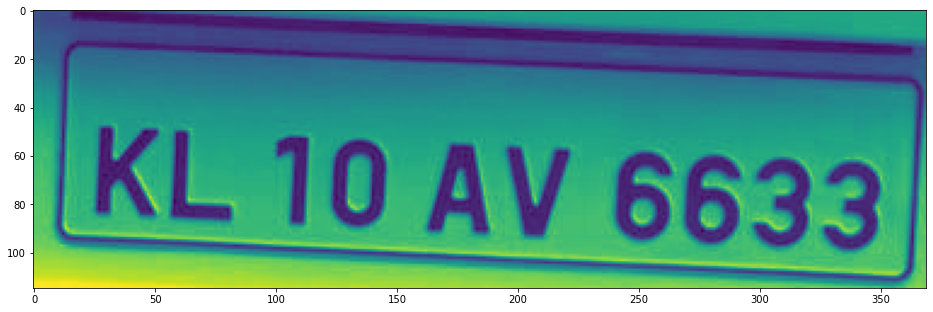

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(pred_plate)

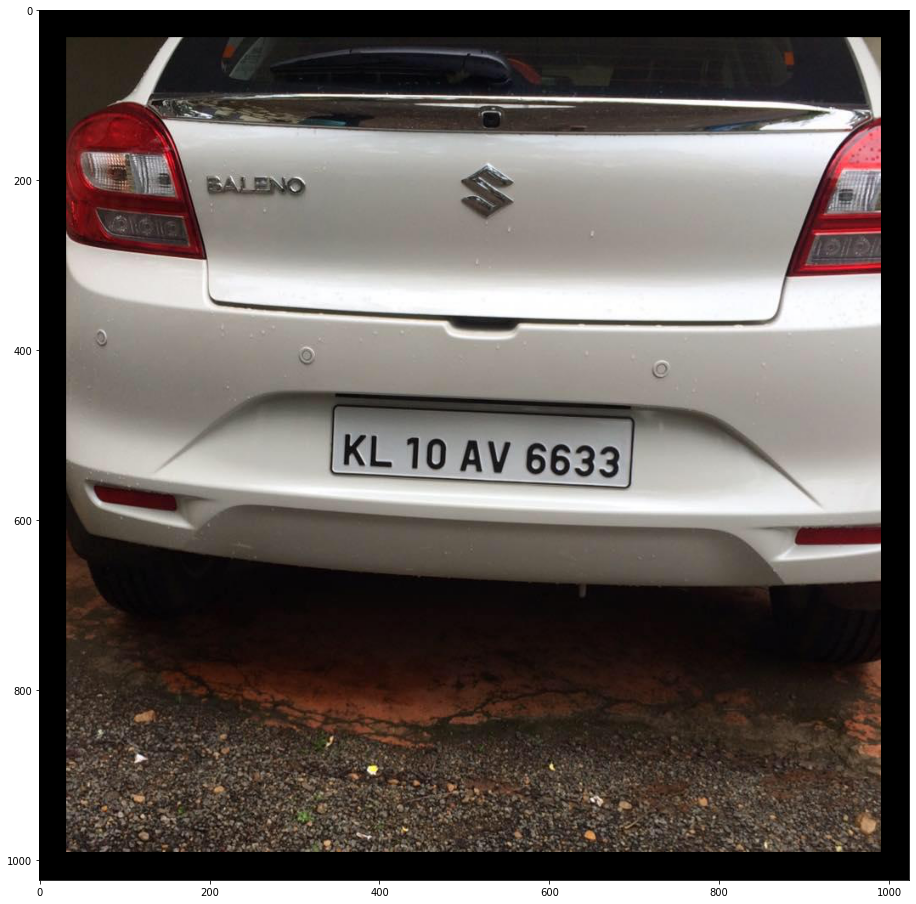

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(image)